In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [3]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:5]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
temp = df[['T (degC)','p (mbar)']]

Text(0, 0.5, 'P')

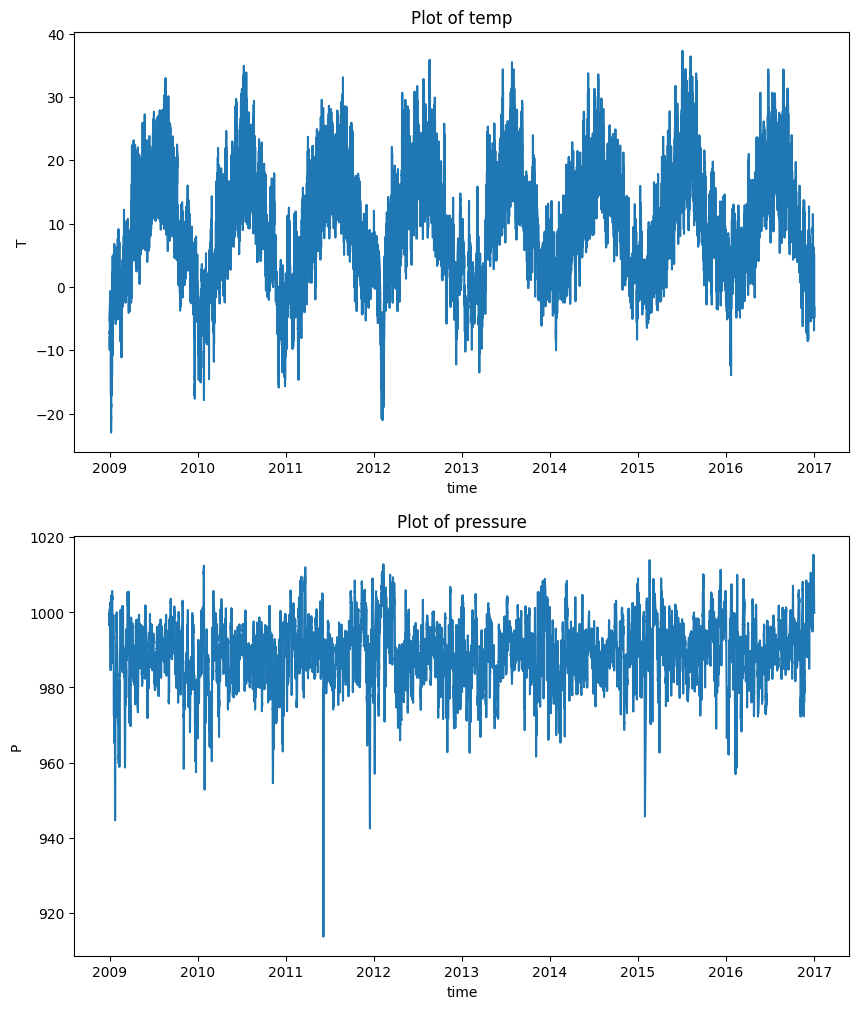

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(10, 12))
axs[0].plot(temp['T (degC)'])
axs[0].set_title('Plot of temp')
axs[0].set_xlabel('time')
axs[0].set_ylabel('T')

axs[1].plot(temp['p (mbar)'])
axs[1].set_title('Plot of pressure')
axs[1].set_xlabel('time')
axs[1].set_ylabel('P')

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error as mse

In [8]:
temp_Pres_df = pd.DataFrame({'Temperature': temp['T (degC)'], 'Pressure': temp['p (mbar)']})
temp_Pres_df['Seconds'] = temp_Pres_df.index.map(pd.Timestamp.timestamp)
temp_Pres_df[:5]

,Temperature,Pressure,Seconds
Date Time,,,
2009-01-01 00:10:00,-8.02,996.52,1.230769e+09
2009-01-01 00:20:00,-8.41,996.57,1.230769e+09
2009-01-01 00:30:00,-8.51,996.53,1.230770e+09
2009-01-01 00:40:00,-8.31,996.51,1.230770e+09
2009-01-01 00:50:00,-8.27,996.51,1.230771e+09


In [9]:
day = 60*60*24
year = 365.2425*day

temp_Pres_df['Day sin'] = np.sin(temp_Pres_df['Seconds'] * (2* np.pi / day))
temp_Pres_df['Day cos'] = np.cos(temp_Pres_df['Seconds'] * (2 * np.pi / day))
temp_Pres_df['Year sin'] = np.sin(temp_Pres_df['Seconds'] * (2 * np.pi / year))
temp_Pres_df['Year cos'] = np.cos(temp_Pres_df['Seconds'] * (2 * np.pi / year))
temp_Pres_df = temp_Pres_df.drop('Seconds', axis=1)
temp_Pres_df.head()

,Temperature,Pressure,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 00:10:00,-8.02,996.52,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,-8.41,996.57,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,-8.51,996.53,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,-8.31,996.51,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,-8.27,996.51,0.216440,0.976296,0.009930,0.999951


In [10]:
def df_to_X_Y(df, datapoints = 7):
  df_np = df.to_numpy()
  X = []
  Y = []
  for i in range(len(df_np)-datapoints):
    row = [j for j in df_np[i:i+datapoints]]
    X.append(row)
    label = [df_np[i+datapoints][0], df_np[i+datapoints][1]]
    Y.append(label)
  return np.array(X), np.array(Y)

In [11]:
X, Y = df_to_X_Y(temp_Pres_df)
X.shape, Y.shape

((420544, 7, 6), (420544, 2))

In [12]:
X_train, y_train = X[:60000], Y[:60000]
X_val, y_val = X[60000:65000], Y[60000:65000]
X_test, y_test = X[65000:], Y[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 7, 6),
 (60000, 2),
 (5000, 7, 6),
 (5000, 2),
 (355544, 7, 6),
 (355544, 2))

In [13]:
p_training_mean = np.mean(X_train[:, :, 0])
p_training_std = np.std(X_train[:, :, 0])

temp_training_mean = np.mean(X_train[:, :, 1])
temp_training_std = np.std(X_train[:, :, 1])

In [14]:
def preprocessX(X, mean, std, inx):
  X[:, :, inx] = (X[:, :, inx] - mean) / std
def preprocessy(y, mean, std, inx):
  y[:, inx] = (y[:, inx] - mean) / std


In [15]:
preprocessX(X_train, temp_training_mean, temp_training_std, 0)
preprocessX(X_val, temp_training_mean, temp_training_std, 0)
preprocessX(X_test, temp_training_mean, temp_training_std, 0)
preprocessX(X_train, p_training_mean, p_training_std, 1)
preprocessX(X_val, p_training_mean, p_training_std, 1)
preprocessX(X_test, p_training_mean, p_training_std, 1)

preprocessy(y_train, p_training_mean, p_training_std, 1)
preprocessy(y_val, p_training_mean, p_training_std, 1)
preprocessy(y_test, p_training_mean, p_training_std, 1)
preprocessy(y_train, temp_training_mean, temp_training_std, 0)
preprocessy(y_val, temp_training_mean, temp_training_std, 0)
preprocessy(y_test, temp_training_mean, temp_training_std, 0)

In [16]:
model = Sequential()
model.add(InputLayer((7, 6)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(2, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18176     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [40]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0049 - root_mean_squared_error: 0.0701 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0897
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0047 - root_mean_squared_error: 0.0683 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0508
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0043 - root_mean_squared_error: 0.0658 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0501
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0040 - root_mean_squared_error: 0.0632 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0988
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0040 - root_mean_squared_error: 0.0632 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1579
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0040 - root_mean_squared_error: 0.0632 - val_l

In [21]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std) + temp_training_mean
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std) + p_training_mean
  return arr

In [25]:
def plot_predictions(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds = postprocess_p(predictions[:, 1])
    temp_preds = postprocess_temp(predictions[:, 0])
    p_actuals = postprocess_p(y[:, 1])
    temp_actuals = postprocess_temp(y[:, 0])

    df = pd.DataFrame(data={
        'Temperature Predictions': temp_preds,
        'Temperature Actuals': temp_actuals,
        'Pressure Predictions': p_preds,
        'Pressure Actuals': p_actuals
    })

    fig, axs = plt.subplots(2, 1, figsize=(10, 12))

    axs[0].plot(df['Temperature Predictions'][start:end], label='Temperature Predictions', color='b', marker='o')
    axs[0].plot(df['Temperature Actuals'][start:end], label='Temperature Actuals', color='r', marker='x')
    axs[0].set_title('Temperature Predictions vs Actuals')
    axs[0].set_xlabel('Index')
    axs[0].set_ylabel('Temperature')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(df['Pressure Predictions'][start:end], label='Pressure Predictions', color='b', marker='o')
    axs[1].plot(df['Pressure Actuals'][start:end], label='Pressure Actuals', color='r', marker='x')
    axs[1].set_title('Pressure Predictions vs Actuals')
    axs[1].set_xlabel('Index')
    axs[1].set_ylabel('Pressure')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

    return df[start:end]

11111/11111 [==============================] - 36s 3ms/step


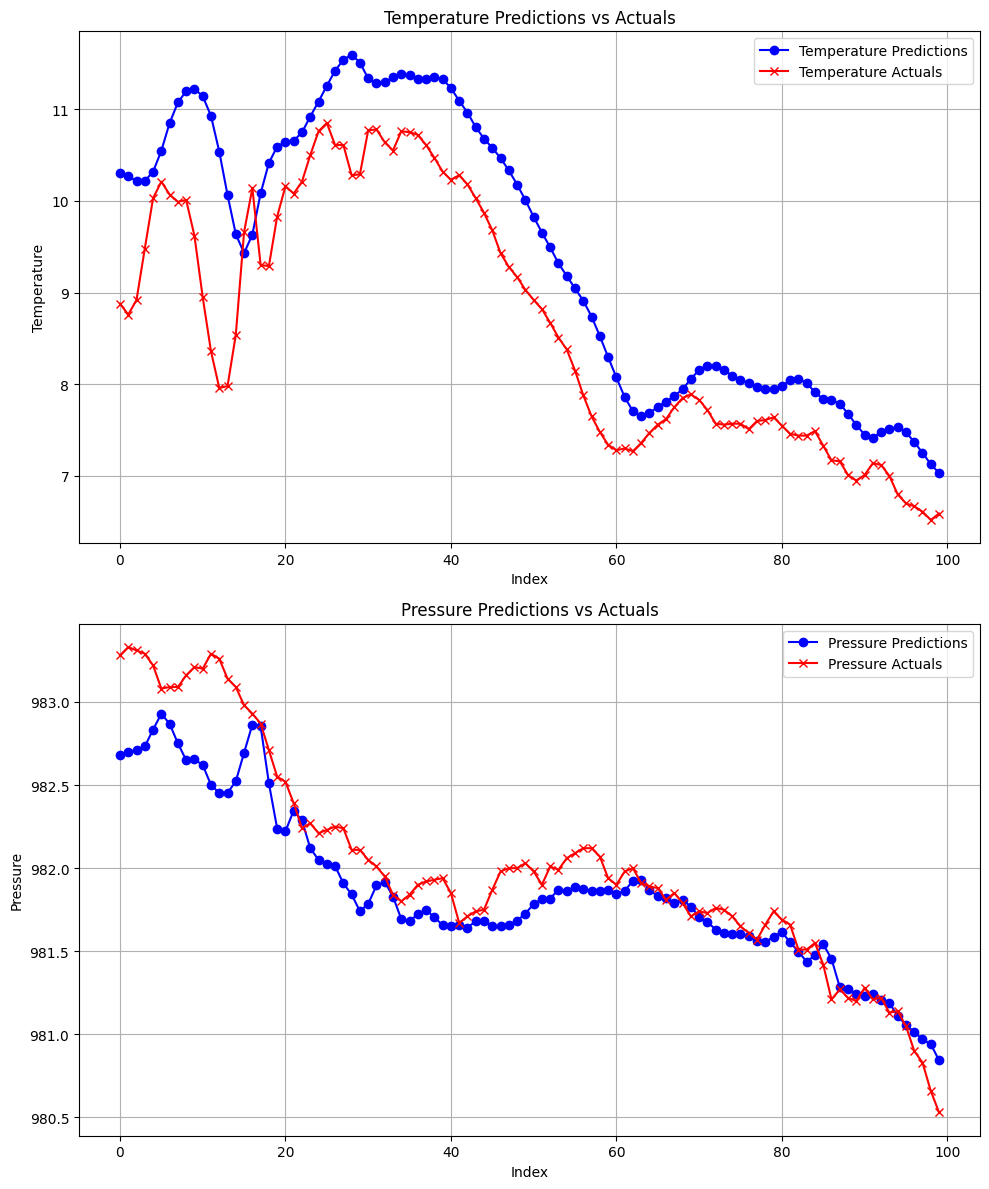

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,10.300415,8.88,982.681396,983.28
1,10.268066,8.76,982.698425,983.33
2,10.217896,8.92,982.712097,983.31
3,10.218445,9.48,982.732056,983.29
4,10.318298,10.03,982.833557,983.22
...,...,...,...,...
95,7.476135,6.70,981.056519,981.05
96,7.370483,6.67,981.014160,980.90
97,7.252197,6.61,980.970154,980.83
98,7.127625,6.52,980.941528,980.66


In [26]:
post_processed_df = plot_predictions(model, X_test, y_test)
post_processed_df

In [29]:
temp_Pres_df[65000:]

,Temperature,Pressure,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2010-03-28 09:50:00,8.78,983.17,5.372996e-01,-0.843391,0.996869,0.079066
2010-03-28 10:00:00,8.91,983.01,5.000000e-01,-0.866025,0.996879,0.078947
2010-03-28 10:10:00,8.98,983.03,4.617486e-01,-0.887011,0.996888,0.078828
2010-03-28 10:20:00,9.19,983.18,4.226183e-01,-0.906308,0.996898,0.078708
2010-03-28 10:30:00,8.99,983.06,3.826834e-01,-0.923880,0.996907,0.078589
...,...,...,...,...,...,...
2016-12-31 23:20:00,-4.05,1000.07,-1.736482e-01,0.984808,0.009887,0.999951
2016-12-31 23:30:00,-3.35,999.93,-1.305262e-01,0.991445,0.010006,0.999950
2016-12-31 23:40:00,-3.16,999.82,-8.715574e-02,0.996195,0.010126,0.999949


In [41]:
def plot_predictions2(model, X, y, start=0, end=100, datetime_df=None):
    predictions = model.predict(X)
    p_preds = postprocess_p(predictions[:, 1])
    temp_preds = postprocess_temp(predictions[:, 0])
    p_actuals = postprocess_p(y[:, 1])
    temp_actuals = postprocess_temp(y[:, 0])

    df = pd.DataFrame(data={
        'Temperature Predictions': temp_preds,
        'Temperature Actuals': temp_actuals,
        'Pressure Predictions': p_preds,
        'Pressure Actuals': p_actuals
    })

    if datetime_df is not None and 'Date Time' in datetime_df.columns:
        date_range = datetime_df['Date Time'].iloc[65000:65000 + len(df)]
        df['Date Time'] = date_range.values
    else:
        raise ValueError("datetime_df must be provided and must contain a 'Date Time' column")

    df = df.iloc[start:end]

    fig, axs = plt.subplots(2, 1, figsize=(10, 12))

    axs[0].plot(df['Date Time'], df['Temperature Predictions'], label='Temperature Predictions', color='b', marker='o')
    axs[0].plot(df['Date Time'], df['Temperature Actuals'], label='Temperature Actuals', color='r', marker='x')
    axs[0].set_title('Temperature Predictions vs Actuals')
    axs[0].set_xlabel('Date Time')
    axs[0].set_ylabel('Temperature')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(df['Date Time'], df['Pressure Predictions'], label='Pressure Predictions', color='b', marker='o')
    axs[1].plot(df['Date Time'], df['Pressure Actuals'], label='Pressure Actuals', color='r', marker='x')
    axs[1].set_title('Pressure Predictions vs Actuals')
    axs[1].set_xlabel('Date Time')
    axs[1].set_ylabel('Pressure')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()

    plt.show()

    return df

temp_Pres_df = pd.DataFrame({
    'DateTime': pd.date_range(start='1/1/2020', periods=100000, freq='T'),
    'T': range(100000),
    'P': range(100000, 200000)
})




11111/11111 [==============================] - 33s 3ms/step


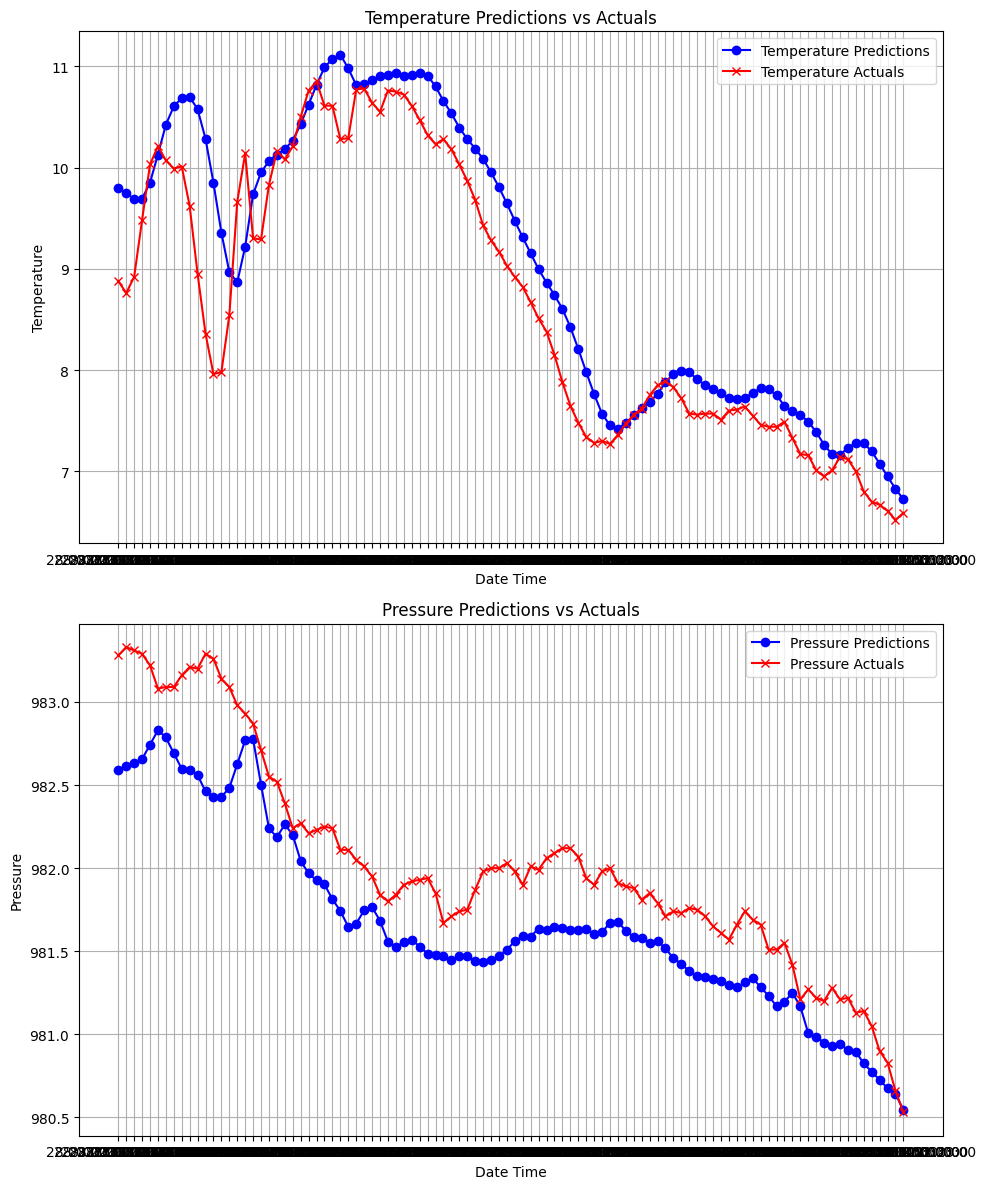

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals,Date Time
0,9.799133,8.88,982.589600,983.28,28.03.2010 09:50:00
1,9.749023,8.76,982.616638,983.33,28.03.2010 10:00:00
2,9.689026,8.92,982.633484,983.31,28.03.2010 10:10:00
3,9.692200,9.48,982.655762,983.29,28.03.2010 10:20:00
4,9.849731,10.03,982.742432,983.22,28.03.2010 10:30:00
...,...,...,...,...,...
95,7.197266,6.70,980.774902,981.05,29.03.2010 01:40:00
96,7.075989,6.67,980.726746,980.90,29.03.2010 01:50:00
97,6.949219,6.61,980.674500,980.83,29.03.2010 02:00:00
98,6.827087,6.52,980.640991,980.66,29.03.2010 02:10:00


In [42]:
plot_predictions2(model=model, X=X_test, y=y_test, start=0, end=100, datetime_df=df)